# MODELOS EVOLUTIVOS

Testamos dois algoritmos genéticos para o projeto Pacman. A seguir, mostramos cada um deles e suas premissas.

# 1. Algoritmo Genético 1

## 1.1 Ficha-Resumo:

• <b>Modelo adotado:</b> Algotirmo Genético Modificado;<br>
• <b>Gene:</b> Lista com 5 floats entre 0 e 100; <br>
• <b>Chromossomo:</b> 1000 genes em um vetor; <br>
• <b>Função Fitness:</b> Score do jogo; <br>
• <b>Tamanho da População:</b> 20 indivíduos; <br>
• <b>População inicial:</b> Escolha alheatória com distribuição uniforme; <br>
• <b>Critério de Parada: </b> 100 gerações;<br>
• <b>Técnica de Seleção:</b> Torneio com 4 indivíduos; <br>
• <b>Técnica de Crossover:</b> Double point com a troca de 100 genes; <br>
• <b>Técnica de Mutação:</b> Swap; <br>
• <b>Método de Replacement:</b>Steady State (5 melhores da pop anterior e n-5 melhores da pop intermediaria) ; <br>
• <b>Taxa de Mutação:</b> 10%; <br>
• <b>Taxa de Crossover:</b> 80%; <br>

## 1.2 Explicação:


 
### 1.2.1 Gene:
Abaixo, apresentamos um fluxograma para um estado, com um gene de um agente para este estado, contendo uma lista de 5 pesos que variam de 0 a 100. Cada peso irá multiplicar o output de uma função do agente que retorna um dicionário com as direções. Cada direção conterá um valor calculado por uma idéia de distância heurística que definimos e que explicaremos a seguir. A ideia é que os pesos definam a importância do output (as direções) de cada função para a tomada de descisão do agente para a próxima direção.

Após definir a próxima direção, o agente checa se essa direção é possível. Se for, ele move-se à ela, se não, escolhemos a segunda direção ótima. E novamente checamos se é possível realizá-la, e continuamos o processo até encontrar uma direção possível. Após mover-se para um novo estado, o agente recebe um novo gene, ou seja, um novo conjunto de pesos para ponderar o output das funções, e assim o processo se repete até que o jogo acabe, ou que o limite de 1000 ações (1000 genes que definem os pesos para a tomada de decisões do agente em cada estado) seja atingido. Se atingirmos esse limite, o agente pára e espera algum fantasma o encontrar.
<img height="500px" class="center-block" src="assets/pacman.jpeg">



### 1.2.2 Distância Heurística do agente para os fantasmas:

Como exemplo, imaginemos que nosso agente se encontra na posição (3,3) do grid e existe um fantasma na posição (6,5), como mostrado na Figura 1. Nossa função de distância heurística checa o maior eixo do fantasma em relação ao pacman e vota para ir na distância oposta ao fantasma. Se tivermos dois fantasmas, como na figura 2, fazemos o mesmo processo, calculamos o maior eixo de distância do fantasma ao pacman e votamos para as direções opostas.
<br>
<br>
<br>

<div class="row">
  <div class="col-md-6" markdown="1">
   Figura 1. Pacman e um fantasma
  <img height="500px" class="center-block" src="assets/pac1.jpg">
  </div>
  <div class="col-md-6" markdown="1">
   Figura 2. Votando na direção para dois fantasmas
  <img height="500px" class="center-block" src="assets/pac2.jpg">
  </div>    
   <div class="col-md-12" markdown="1">
        Caso tivermos um terceiro fantasma cuja distância dos eixos são iguais, então votamos para as duas direções opostas ao fantasma, como podemos conferir na imagem abaixo. No exemplo, nossa função de distância para todos os fantasmas retornaria um dicionário com as seguintes direções <i>{'North':0,'East':1,'South':2,'West':1},</i> que nada mais é do que somar cada voto para cada direção.
       Desse dicionário, multiplicamos o peso para esta função, definido pela posição na lista de pesos do gene.
       <br><br>
       Figura 3. Votação final fantasmas
   <img height="400px" class="center-block" src="assets/pac3.jpg">
   </div>
</div>
<br>


### 1.2.3 Distância Heurística do agente por comida:
Já para comida, nosso agente utiliza uma estratégia um pouco diferente. Primeiro, consideramos que o agente  estará sempre na posição (0,0). Além disso, ele se preocupa apenas com as comidas que estão dentro de um quadrado, que se inicia com lado de tamanho 4 unidades, como demonstrado na figura 4. Se não encontramos nenhuma comida, o lado do quadrado aumenta em duas unidades, como na figura 5. Caso ainda nosso agente não encontre comida, o processo se repete até 15 tentativas.

Ao encontrar comida, calculamos a mesma distância heurística que utilizamos para os fantasmas, porém agora nosso algoritmo vota para a direção a favor da comida, e não na direção oposta, como era feito com os fantasmas.
<br>
<br>
<br>
<div class="row">
 <div class="col-md-5" markdown="1">
Figura 4. Quadrado de busca inicializado com lado 4.
  
  </div>
  <div class="col-md-1" markdown="1">
      
  </div>

  <div class="col-md-5" markdown="1">
 Figura 5. Expansão do quadrado e cálculo das distâncias
  </div>
 
    
    
  <div class="col-md-5" markdown="1">

  <img height="500px" class="center-block" src="assets/pac4.jpg">
  </div>
  <div class="col-md-1" markdown="1">
      
  </div>

  <div class="col-md-5" markdown="1">
  <img height="500px" class="center-block" src="assets/pac5.jpg">
  </div>
</div>

### 1.2.3 Definindo a próxima posição baseado em todas as funções:
É importante salientar que o quadrado só serve para comida. Ou seja, mesmo que um fantasma não se encontre dentro do quadrado, a direção oposta à sua posição entrará na votação. Na figura 6 apresentamos a votação para todas as funções que realizamos. É importante lembrar que para cada função (distância da comida mais próxima, distância para todas as comidas dentro do quadrado, distância de todos os fantasmas, distância do fantasma mais próximo e a próxima jogada que apresente o maior score momentâneo), essa votação das direções será ponderada por um peso que o gene traz para cada função. 
<br>
<br>
<div class="col-md-12" markdown="1">
   Figura 6. Votação final
   <img height="200px" class="center-block" src="assets/pac6.jpg">
   </div>
<br>
<br>

## 1.3 Análise dos Resultados:
Nossos resultados não foram satisfatórios, pois nosso algoritmo não convergiu

## 1.x CÓDIGO:
### 1.x.1 Definição do agente do jogo Pacman

Baseamos nossa escolha de agente como um pacman que decide o próximo passo a ser dado ao analisar em seu estado atual qual a posição de todos os fantasmas, do fantasma mais próximo, das comidas dentro de um raio e da comida mais próxima.

In [6]:
from pacman import GameState,readCommand
from collections import Counter
from game import Agent
from game import Directions
from util import manhattanDistance
from heuristic import heuristicDistance
import seaborn as sns
import pacman
import random
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
class theBestAgentOnEarth(Agent):
    '''O melhor agente da Terra que recebe pesos para a relevância de funções de busca, como
    a posição da melhor comida, do fantasma mais próximo, etc, para calcular o próximo passo do Agente'''
    
    def __init__(self,weights):
        self.weights = weights
        
    def registerInitialState(self, state):
        return    
    
    
    
    def getAction(self,state):
        
        def dirComida(state,weight1,weight2,lado_quadrado):
            '''Função que recebe dois pesos e um número. Ela verifica por comida num quadrado em torno do pacman.
            A função recebe o tamanho do lado do quadrado. Ela retorna a direção em que mais comidas estão nesse
            quadrado (Oeste,Leste,Norte, Sul), ponderada pelo peso 1 e a direção da comida mais próxima ponderada
            pelo peso 2.'''
            east=west=north=south=0 #inicializando as variaveis para contar as direções mais frequentes
            best_east=best_west=best_north=best_south=0 #inicializando as variaveis para as direções
                                                        #da comida mais próxima
            near_x=near_y=0
            near_food=10000
            #Cria o quadrado ladoxlado em volta do pacman para checar se tem comida e qual a direção da comida
            for eixo_x in range(int(-(lado_quadrado/2)),int((lado_quadrado/2)+1)):
                for eixo_y in range(int(-(lado_quadrado/2)),int((lado_quadrado/2)+1)):
                    try:
                        #Se tem muro, vai para outro quadrado
                        if state.hasWall(state.getPacmanPosition()[0]+eixo_x,state.getPacmanPosition()[1]+eixo_y):
                            continue
                        else:
                            #Se não tem muro, atualiza o x e y do quadrado
                            x = state.getPacmanPosition()[0]+eixo_x
                            y = state.getPacmanPosition()[1]+eixo_y
                            has_food = state.getFood()[x][y]
                            #Verifica se tem comida no quadrado e adiciona a direção mais forte(sul,norte,leste,oeste)
                            if has_food:
                                #Ve se é a comida mais proxima, se for irá armazenar as direções para o weight 2
                                #Utilizamos a distância de Manhattan pra ver qual comida é a mais próxima
                                dist=manhattanDistance(state.getPacmanPosition(),[x,y])
                                if dist<near_food:
                                    near_food=dist
                                    near_x= x
                                    near_y= y
                                    #Aqui vereficamos o maior eixo e o sinal. Se for,por exemplo, eixo x e sinal 
                                    #positivo, será direção oeste. Se for o mesmo eixo e sinal contrário, será 
                                    #direção este. Do mesmo modo se o eixo y for o maior, será norte se for
                                    #positivo e sul se for negativo
                                    if abs(eixo_x)>abs(eixo_y) and eixo_x<0:
                                        best_west = 0
                                        best_west += 1
                                    elif abs(eixo_x)>abs(eixo_y) and eixo_x>0:
                                        best_east=0
                                        best_east += 1
                                    elif abs(eixo_y)>abs(eixo_x) and eixo_y<0:
                                        best_south=0
                                        best_south += 1
                                    elif abs(eixo_y)>abs(eixo_x) and eixo_y>0:
                                        best_north=0
                                        best_north += 1
                                    elif abs(eixo_y)==abs(eixo_x) and eixo_y>0 and eixo_x>0:
                                        best_north=best_east=0
                                        best_north += 1
                                        best_east += 1
                                    elif abs(eixo_y)==abs(eixo_x) and eixo_y>0 and eixo_x<0:
                                        best_north=best_west=0
                                        best_north += 1
                                        best_west += 1
                                    elif abs(eixo_y)==abs(eixo_x) and eixo_y<0 and eixo_x>0:
                                        best_south=best_east=0
                                        best_south += 1
                                        best_east += 1
                                    elif abs(eixo_y)==abs(eixo_x) and eixo_y<0 and eixo_x<0:
                                        best_south=best_west=0
                                        best_south += 1
                                        best_west += 1
                                #Depois de vermos se é a comida mais próxima, agora checamos a mesma coisa para
                                #as demais comidas. Mesmo se for a comida mais próxima, ela entrará na conta da
                                #comida total.
                                if abs(eixo_x)>abs(eixo_y) and eixo_x<0:
                                    west += 1
                                elif abs(eixo_x)>abs(eixo_y) and eixo_x>0:
                                    east += 1
                                elif abs(eixo_y)>abs(eixo_x) and eixo_y<0:
                                    south += 1
                                elif abs(eixo_y)>abs(eixo_x) and eixo_y>0:
                                    north += 1
                                elif abs(eixo_y)==abs(eixo_x) and eixo_y>0 and eixo_x>0:
                                    north += 1
                                    east += 1
                                elif abs(eixo_y)==abs(eixo_x) and eixo_y>0 and eixo_x<0:
                                    north += 1
                                    west += 1
                                elif abs(eixo_y)==abs(eixo_x) and eixo_y<0 and eixo_x>0:
                                    south += 1
                                    east += 1
                                elif abs(eixo_y)==abs(eixo_x) and eixo_y<0 and eixo_x<0:
                                    south += 1
                                    west += 1                            
                    except:
                        continue
                        
            #Agora que fizemos a contagem das direções, a função retorna
            #dois dicionários, um para a comida mais próxima e outro para o total de comidas.
            # Cada dicionário contém todas as direções como keys e a contagem das direções, já ponderada
            #pelo reespectivos pesos, 1 e 2 (Peso 1 para a comida total e peso 2 para a comida mais próxima).
            actions_count_all={'East':weight1*east,'West':weight1*west,'North':weight1*north,'South':weight1*south}
            
            actions_count_near={'East':weight2*best_east,'West':weight2*best_west,
                                'North':weight2*best_north,'South':weight2*best_south}
            return actions_count_all , actions_count_near
        
        def futureBestState(state,legal,weight):
            dic = {'East':0,'West':0,'North':0,'South':0}
            score_list = [0,0,0,0]
            for action in dic.keys():
                if action in legal:
                    score = state.generatePacmanSuccessor(action).getScore()
                    dic[action]=score*weight
            return dic
        def dirNearGhost(state,weight):
            '''Função que recebe um peso, verifica pelo fantasma mais perto e retorna direção oposta ponderada
            pelo peso recebido.'''
            
            east=west=north=south=0 #inicializando as variaveis para contar as direções mais frequentes
            numGhost = state.getNumAgents() #Número de fantasmas
            near_dist = 10000 #Estabelecendo um valor de distância alto para ser substituido
            #função que busca o fantasma mais perto, baseado na distância de manhattan
            for ghost in range(1,numGhost):
                dist=manhattanDistance(state.getPacmanPosition(),state.getGhostPosition(ghost))
                if dist<near_dist:
                    near_dist=dist
                    near_ghost=ghost
            #Selecionamos agora a direção do fantasma mais proximo
            x,y=heuristicDistance(state.getPacmanPosition(),state.getGhostPosition(near_ghost))
            #Aqui inevertemos a melhor direção, para o pacman ir para uma direção oposta do fantasma
            if abs(x)>abs(y):
                if x>0:
                    east += 1
                else:
                    west += 1
                    
            elif abs(x)==abs(y):
                if x>0:
                    east += 1
                    north += 1
                else:
                    west += 1
                    south += 1
            else:
                if y>0:
                        north += 1
                else:
                        south += 1
            #Retornamos um dicionário com todas as direções como key e a contagem, já ponderada pelo peso,
            #como values                         
            actions_count={'East':weight*east,'West':weight*west,'North':weight*north,'South':weight*south}
            return actions_count
         
        def dirAllGhost(state,weight):
            '''Função que recebe um peso, verifica os fantasmas e retorna a direção oposta da somatória dos fantasmas
            ponderada pelo peso passado na função.'''
           
            east=west=north=south=0 #inicializando as variaveis para contar as direções mais frequentes
            numGhost = state.getNumAgents() #Número de fantasmas. Sabemos que o pacman é contado aqui, mas não importa
                                            # porque na função range() utilizada abaixo começamos no 1, e não no zero

            for ghost in range(1,numGhost):
                x,y=heuristicDistance(state.getPacmanPosition(),state.getGhostPosition(ghost))
                #Aqui inevertemos a melhor direção, para o pacman ir para uma direção oposta ao do fantasma
                if abs(x)>abs(y):
                    if x>0:
                        east += 1
                    else:
                        west += 1
                    
                elif abs(x)==abs(y):
                    if x>0:
                        east += 1
                        north += 1
                    else:
                        west += 1
                        south += 1
                else:
                    if y>0:
                        north += 1
                    else:
                        south += 1
            #Retornamos um dicionário com todas as direções como key e a contagem, já ponderada pelo peso,
            #como values            
            actions_count={'East':weight*east,'West':weight*west,'North':weight*north,'South':weight*south}
            return actions_count
        
        #Agora iniciamos a função getAction, retirando um dos cromossomos do indivíduo (cada
        #passo dado pelo indivíduo no jogo, ponderada pelos pesos). Ou seja, o gene contém a lista de pesos
        #para cada uma das funções estabelecidas: peso 1 dado para a melhor direção para comidas, peso dois 
        #para a melhor direção para comida mais próxima, peso três para a direção oposta
        # de todos os fantasmas e direção oposta do fantasma mais próximo.
        try:
            gene=self.weights.pop(0) #Retira um gene da lista de passos
        except:
            return Directions.STOP
        legal = state.getLegalPacmanActions() #Verifica as ações legais do agente
        tentativas=0 #Inicializa a variável de tentativas para achar a melhor direção dado os pesos
        lado_quadrado=2 #Inicializa o tamanho do lado do quadrado do pacman para a busca da comida
        food = state.getNumFood()
        while tentativas<15 and food > 10:#Tenta 15 vezes encontrar alguma direção ou ate faltar 10 comidas
            tentativas+=1 #Vamos contando o número de tentativas
            lado_quadrado+=2 #A cada tentativa, aumentamos o quadrado de busca por comida
            #Vemos o dicionário de ações para a melhor comida e para todas as comidas
            all_food_best_dir, near_food_best_dir = dirComida(state,int(gene[0]),int(gene[1]),lado_quadrado)
            #Vemos o dicionário de ações para o fantasma mais próximo e todos os fantasmas
            all_ghost_best_dir = dirAllGhost(state,int(gene[2]))
            near_ghost_best_dir = dirNearGhost(state,int(gene[3]))
            best_future_action = futureBestState(state,legal,int(gene[4]))
            final = dict(Counter(all_food_best_dir) + Counter(near_food_best_dir) + 
                     Counter(all_ghost_best_dir)+
                     Counter(near_ghost_best_dir)+
                     Counter(best_future_action))
            final = dict(sorted(final.items(), key=lambda item: item[1],reverse=True))
            for i in range(len(final)):
                melhor_direcao = list(final.keys())[i]
                if melhor_direcao in legal:
                    return melhor_direcao
        #Se nenhuma dessas tentativas derem certo, para evitar erro, retornamos uma direção aleatória dentre
        # as direções legais dos agentes
        all_food_best_dir, near_food_best_dir = dirComida(state,int(gene[0]),int(gene[1]),lado_quadrado)
        best_future_action = futureBestState(state,legal,int(gene[4]))
        final = dict(Counter(near_food_best_dir) + Counter(best_future_action))
        final = dict(sorted(final.items(), key=lambda item: item[1],reverse=True))
        for i in range(len(final)):
            melhor_direcao = list(final.keys())[i]
            if melhor_direcao in legal:
                return melhor_direcao
        final = dict(sorted(near_food_best_dir.items(), key=lambda item: item[1],reverse=True))
        if list(final.keys())[0] in legal:
            return list(final.keys())[0]
        return random.choice(legal)

## Funções para o algoritmo genético

In [7]:
def generateGene():
    '''Função que retorna um gene. Ela gera uma lista com 5 números de 0 a 100 criados aleatoriamente'''
    gene=[]
    for weight in range(0,5):
        gene.append(random.uniform(0, 100))
    return gene
def generateIndividuo():
    '''Função que retorna um indivíduo. Ela gera um indivíduo com 1000 passos, valor suficiente para resolver
    até o layout mais complexo do pacman.'''
    individuo=[]
    for jogadas in range(0,1000):
        individuo.append(generateGene())
    return individuo
def generatePopulation(size):
    '''Função que recebe o layout do jogo e um tamanho e cria uma população de indivíduos. Ela
    retorna duas listas, a população e os scores de cada indivíduo. O score na posição 0 da lista será do 
    indivíduo da população na posição 0.'''
    population=[]
    for i in range(0,size):
        individuo = generateIndividuo()
        individuo_temp=individuo #Passamos para uma variável temporária pois o .pop(0)do getAction
                                    #remove os passos dados dos indivíduos
        population.append(individuo)
    return population

def pacmanAvarageScore(individuo,num_tentativas,flag):
    '''Função que recebe o indivíduo, a quantidade de jogos que ele irá realizar e o layout do jogo.
    Ela retorna o score médio da quantidade de jogos realizados para esse indivíduo.'''
    tentativas_ind=[]
    layouts=['smallClassic']
    for layout in layouts:
        for tentativas in range(0,num_tentativas):
            if flag:
                args = ['--layout',layout,'--pacman','DumbAgent','-q']
            else:
                args = ['--layout',layout,'--pacman','DumbAgent']
            args_list = readCommand(args)
            test = theBestAgentOnEarth(individuo)
            score= pacman.runGames(pacman=test,layout=args_list['layout'],ghosts=args_list['ghosts'],display=args_list['display'],
                           numGames=args_list['numGames'],record=args_list['record'])
            tentativas_ind.append(score)
    return np.mean(tentativas_ind)

def evaluatePopulation(population,flag):
    '''Função que recebe o layout do jogo e um tamanho e cria uma população de indivíduos. Ela
    retorna duas listas, a população e os scores de cada indivíduo. O score na posição 0 da lista será do 
    indivíduo da população na posição 0.'''
    scores=[]
    for i in range(0,len(population)):
        print('individuo ',i+1)
        individuo = population[i]
        individuo_temp=deepcopy(individuo) #Passamos para uma variável temporária pois o .pop(0)do getAction
                                    #remove os passos dados dos indivíduos
        avg_score = pacmanAvarageScore(individuo_temp,5,flag)
        scores.append(avg_score)
    return scores

def mutation(population,rate):
    '''Função que recebe uma população e uma taxa e define uma porcentagem da população para realizar mutação
    de cromossomos nos seus indivíduos da essa taxa recebida'''
    for selected in range(int(len(population)*rate)): #Seleciona uma quantidade x de indivíduos, dado a rate
        position_individual = random.randint(0,len(population)-1) #seleciona um indivíduo aleatório na população
        position_cromossom1 = random.randint(0,len(population[position_individual])-1)#Seleciona um cromossomo aleatório
        position_cromossom2 = random.randint(0,len(population[position_individual])-1)#Seleciona outro cromossomo aleatório
        crom1 = population[position_individual][position_cromossom1]
        crom2 = population[position_individual][position_cromossom2]
        
        population[position_individual][position_cromossom1] = crom2
        population[position_individual][position_cromossom2] = crom1
    return population
def torneio(pairs,tournment_size):
    participantes_torneio=[]
    for number in range(tournment_size):
        position_individual = random.randint(0,len(pairs)-1)
        individuo = pairs[position_individual]
        participantes_torneio.append(individuo)
    participantes_torneio.sort(reverse=True, key=lambda li: li[0])
    return participantes_torneio[0]
def crossover(pairs,range_cromossomos,aleatorio):
    '''Função que recebe um pair [score, população] e uma taxa e um range de valores e define uma porcentagem da população
    para realizar crossover desse range de valores (recebido pela função) para os cromossomos dos indivíduos'''
    novos_pares=[]
    for i in range(int((len(pairs)*0.8)/2)): #Para 80% dosindivíduos de individuos na populacao
        
        individual1 = torneio(pairs,4) #seleciona um indivíduo 1 aleatório na população
        individual2 = torneio(pairs,4) #seleciona um indivíduo 2 aleatório na população
        #Apos selecionar as posições dos indivíduos, selecionamos o range de seus primeiros cromossomos     
        crom1_list = individual1[1][aleatorio:aleatorio+range_cromossomos]
        crom2_list = individual2[1][aleatorio:aleatorio+range_cromossomos]
            
        individual1[1][aleatorio:aleatorio+range_cromossomos] = crom2_list
        individual2[1][aleatorio:aleatorio+range_cromossomos] = crom1_list
        novos_pares.append(individual1)
        novos_pares.append(individual2)
    population = [el[1] for el in novos_pares]
    return population

def makePairs(scores,population):
    lista=[]
    for i in range(len(population)):
        item=[scores[i], population[i]]
        lista.append(item)
    lista.sort(reverse=True, key=lambda li: li[0])
    return lista

def mergePopulationAndScores(pairs,pairs_linha):
    pop = pairs[:10] + pairs_linha[:-10]
    population = [el[1] for el in pop]
    scores = [el[0] for el in pop]
    return population, scores

# Main

In [ ]:
dic={}
#genetic program procedure
t = 0

# Initialize_Population P(0)
size=1000
P = generatePopulation(size)
delta_score = 1
# While not (wall_condition) do
while t <= 200: #delta_score < 0.001 or 
    print('GERAÇÃO',t)
    # Evaluate_Population P(t)
    print('pais:')
    scores = evaluatePopulation(P,flag=True)
    pairs= makePairs(scores,P)
    #Duplicationof the best 25% individuals of P(t)
    pairs_duplication = pairs[:int(len(pairs)*0.2)]
    Pduplication = [el[1] for el in pairs_duplication]
    # P_cross = crossover 80% de P(t) de 100 primeiros genes
    aleatorio = np.random.randint(0,600)
    Pcrossover = crossover(pairs,100,aleatorio)
    #P'(t) = duplication + cross
    
    Plinha = Pcrossover + Pduplication
    
    Plinha = mutation(Plinha,0.1)
    # Evaluate_Population P’
    print('filhos:')
    scores_linha  = evaluatePopulation(Plinha,flag=True)
    pairs_linha = makePairs(scores_linha,Plinha)
    
    # P(t+1) = Select_s survivors P(t) from P '
    P, scores_final = mergePopulationAndScores(pairs,pairs_linha)
    dic[t] = scores_final
    t = t + 1
#End

GERAÇÃO 0
pais:
individuo  1
individuo  2
individuo  3
Pacman emerges victorious! Score: 1373
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
Pacman emerges victorious! Score: 903
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
Pacman emerges victorious! Score: 793
individuo  18
individuo  19
Pacman emerges victorious! Score: 893
individuo  20
Pacman emerges victorious! Score: 873
individuo  21
individuo  22
individuo  23
individuo  24
Pacman emerges victorious! Score: 934
individuo  25
Pacman emerges victorious! Score: 927
individuo  26
individuo  27
individuo  28
individuo  29
individuo  30
individuo  31
individuo  32
individuo  33
individuo  34
individuo  35
individuo  36
individuo  37
individuo  38
individuo  39
individuo  40
individuo  41
individuo  42
Pacman emerges victorious! Score: 919
individuo  43
individuo  44
Pacman emerges victorious! Score: 920
individuo  45
individuo  46
indivi

individuo  387
individuo  388
individuo  389
individuo  390
individuo  391
Pacman emerges victorious! Score: 949
Pacman emerges victorious! Score: 1095
individuo  392
Pacman emerges victorious! Score: 797
individuo  393
individuo  394
Pacman emerges victorious! Score: 919
individuo  395
individuo  396
individuo  397
Pacman emerges victorious! Score: 1097
individuo  398
individuo  399
individuo  400
individuo  401
individuo  402
individuo  403
individuo  404
individuo  405
individuo  406
individuo  407
individuo  408
individuo  409
individuo  410
individuo  411
Pacman emerges victorious! Score: 896
individuo  412
Pacman emerges victorious! Score: 929
individuo  413
individuo  414
individuo  415
individuo  416
individuo  417
Pacman emerges victorious! Score: 882
individuo  418
individuo  419
individuo  420
individuo  421
individuo  422
individuo  423
individuo  424
individuo  425
individuo  426
Pacman emerges victorious! Score: 985
individuo  427
Pacman emerges victorious! Score: 900
ind

Pacman emerges victorious! Score: 961
individuo  770
individuo  771
Pacman emerges victorious! Score: 905
individuo  772
individuo  773
individuo  774
individuo  775
individuo  776
individuo  777
individuo  778
Pacman emerges victorious! Score: 1150
individuo  779
individuo  780
individuo  781
individuo  782
individuo  783
individuo  784
Pacman emerges victorious! Score: 937
individuo  785
individuo  786
individuo  787
individuo  788
individuo  789
individuo  790
individuo  791
individuo  792
individuo  793
individuo  794
Pacman emerges victorious! Score: 881
Pacman emerges victorious! Score: 1377
individuo  795
Pacman emerges victorious! Score: 930
individuo  796
individuo  797
individuo  798
individuo  799
individuo  800
Pacman emerges victorious! Score: 1033
individuo  801
Pacman emerges victorious! Score: 971
individuo  802
individuo  803
individuo  804
individuo  805
individuo  806
individuo  807
individuo  808
individuo  809
individuo  810
Pacman emerges victorious! Score: 1038
i

individuo  137
individuo  138
Pacman emerges victorious! Score: 891
individuo  139
individuo  140
individuo  141
individuo  142
individuo  143
individuo  144
individuo  145
individuo  146
individuo  147
individuo  148
individuo  149
individuo  150
Pacman emerges victorious! Score: 881
Pacman emerges victorious! Score: 1063
individuo  151
individuo  152
individuo  153
individuo  154
Pacman emerges victorious! Score: 842
individuo  155
individuo  156
Pacman emerges victorious! Score: 861
individuo  157
Pacman emerges victorious! Score: 903
individuo  158
individuo  159
individuo  160
individuo  161
individuo  162
individuo  163
Pacman emerges victorious! Score: 939
individuo  164
individuo  165
individuo  166
Pacman emerges victorious! Score: 937
individuo  167
individuo  168
individuo  169
individuo  170
Pacman emerges victorious! Score: 963
Pacman emerges victorious! Score: 957
individuo  171
individuo  172
individuo  173
individuo  174
individuo  175
individuo  176
individuo  177
indi

individuo  520
individuo  521
individuo  522
individuo  523
individuo  524
individuo  525
individuo  526
individuo  527
individuo  528
individuo  529
Pacman emerges victorious! Score: 1167
Pacman emerges victorious! Score: 932
individuo  530
individuo  531
individuo  532
individuo  533
individuo  534
individuo  535
Pacman emerges victorious! Score: 826
Pacman emerges victorious! Score: 901
individuo  536
individuo  537
individuo  538
individuo  539
individuo  540
individuo  541
individuo  542
individuo  543
individuo  544
individuo  545
individuo  546
individuo  547
individuo  548
individuo  549
individuo  550
individuo  551
individuo  552
individuo  553
individuo  554
individuo  555
individuo  556
individuo  557
individuo  558
individuo  559
individuo  560
individuo  561
Pacman emerges victorious! Score: 883
individuo  562
individuo  563
individuo  564
individuo  565
individuo  566
individuo  567
individuo  568
individuo  569
individuo  570
individuo  571
individuo  572
individuo  573

individuo  895
individuo  896
Pacman emerges victorious! Score: 948
individuo  897
Pacman emerges victorious! Score: 1099
individuo  898
individuo  899
Pacman emerges victorious! Score: 837
individuo  900
individuo  901
individuo  902
individuo  903
individuo  904
individuo  905
individuo  906
individuo  907
individuo  908
individuo  909
Pacman emerges victorious! Score: 883
individuo  910
Pacman emerges victorious! Score: 1081
individuo  911
individuo  912
individuo  913
individuo  914
individuo  915
Pacman emerges victorious! Score: 955
individuo  916
individuo  917
individuo  918
individuo  919
individuo  920
individuo  921
individuo  922
individuo  923
individuo  924
individuo  925
Pacman emerges victorious! Score: 919
individuo  926
individuo  927
individuo  928
Pacman emerges victorious! Score: 927
individuo  929
individuo  930
individuo  931
individuo  932
individuo  933
individuo  934
individuo  935
individuo  936
individuo  937
individuo  938
individuo  939
individuo  940
indi

individuo  246
Pacman emerges victorious! Score: 917
individuo  247
Pacman emerges victorious! Score: 981
individuo  248
individuo  249
Pacman emerges victorious! Score: 1053
individuo  250
individuo  251
individuo  252
individuo  253
individuo  254
individuo  255
individuo  256
individuo  257
individuo  258
individuo  259
individuo  260
individuo  261
individuo  262
individuo  263
Pacman emerges victorious! Score: 1106
individuo  264
Pacman emerges victorious! Score: 942
individuo  265
individuo  266
individuo  267
Pacman emerges victorious! Score: 1159
individuo  268
individuo  269
Pacman emerges victorious! Score: 967
individuo  270
individuo  271
individuo  272
individuo  273
individuo  274
individuo  275
individuo  276
individuo  277
individuo  278
individuo  279
individuo  280
individuo  281
individuo  282
Pacman emerges victorious! Score: 1315
individuo  283
individuo  284
individuo  285
individuo  286
Pacman emerges victorious! Score: 899
individuo  287
Pacman emerges victoriou

individuo  606
individuo  607
individuo  608
individuo  609
individuo  610
Pacman emerges victorious! Score: 982
individuo  611
individuo  612
Pacman emerges victorious! Score: 1105
individuo  613
individuo  614
individuo  615
Pacman emerges victorious! Score: 1410
individuo  616
individuo  617
individuo  618
individuo  619
individuo  620
individuo  621
individuo  622
individuo  623
individuo  624
individuo  625
individuo  626
individuo  627
individuo  628
individuo  629
individuo  630
individuo  631
individuo  632
individuo  633
individuo  634
individuo  635
individuo  636
Pacman emerges victorious! Score: 857
individuo  637
individuo  638
individuo  639
individuo  640
individuo  641
Pacman emerges victorious! Score: 963
individuo  642
Pacman emerges victorious! Score: 1341
individuo  643
individuo  644
individuo  645
individuo  646
individuo  647
Pacman emerges victorious! Score: 823
individuo  648
Pacman emerges victorious! Score: 855
individuo  649
Pacman emerges victorious! Score:

individuo  976
individuo  977
individuo  978
individuo  979
individuo  980
Pacman emerges victorious! Score: 1227
individuo  981
individuo  982
individuo  983
individuo  984
individuo  985
individuo  986
individuo  987
Pacman emerges victorious! Score: 957
individuo  988
individuo  989
individuo  990
individuo  991
individuo  992
individuo  993
individuo  994
individuo  995
individuo  996
Pacman emerges victorious! Score: 985
individuo  997
individuo  998
individuo  999
individuo  1000
filhos:
individuo  1
Pacman emerges victorious! Score: 897
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
Pacman emerges victorious! Score: 1347
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
individuo  21
individuo  22
individuo  23
individuo  24
individuo  25
individuo  26
Pacman emerges victorious! Score: 983
individuo  27
individuo  28
ind

individuo  376
individuo  377
Pacman emerges victorious! Score: 979
individuo  378
individuo  379
individuo  380
individuo  381
individuo  382
individuo  383
individuo  384
individuo  385
individuo  386
individuo  387
individuo  388
individuo  389
individuo  390
individuo  391
individuo  392
individuo  393
individuo  394
individuo  395
individuo  396
individuo  397
individuo  398
Pacman emerges victorious! Score: 1251
individuo  399
individuo  400
individuo  401
individuo  402
individuo  403
Pacman emerges victorious! Score: 947
individuo  404
individuo  405
individuo  406
Pacman emerges victorious! Score: 962
individuo  407
individuo  408
individuo  409
individuo  410
individuo  411
individuo  412
Pacman emerges victorious! Score: 745
individuo  413
individuo  414
individuo  415
individuo  416
individuo  417
individuo  418
individuo  419
individuo  420
Pacman emerges victorious! Score: 916
individuo  421
individuo  422
Pacman emerges victorious! Score: 1159
individuo  423
individuo  4

individuo  782
individuo  783
individuo  784
individuo  785
Pacman emerges victorious! Score: 1149
individuo  786
individuo  787
Pacman emerges victorious! Score: 1387
individuo  788
individuo  789
individuo  790
individuo  791
individuo  792
individuo  793
Pacman emerges victorious! Score: 855
individuo  794
individuo  795
individuo  796
individuo  797
individuo  798
individuo  799
individuo  800
individuo  801
individuo  802
individuo  803
Pacman emerges victorious! Score: 957
individuo  804
individuo  805
individuo  806
Pacman emerges victorious! Score: 847
individuo  807
individuo  808
individuo  809
individuo  810
individuo  811
individuo  812
individuo  813
individuo  814
individuo  815
individuo  816
individuo  817
individuo  818
individuo  819
individuo  820
individuo  821
individuo  822
individuo  823
individuo  824
individuo  825
individuo  826
individuo  827
individuo  828
Pacman emerges victorious! Score: 959
individuo  829
individuo  830
individuo  831
individuo  832
indiv

Pacman emerges victorious! Score: 1095
individuo  169
individuo  170
individuo  171
individuo  172
individuo  173
Pacman emerges victorious! Score: 947
individuo  174
individuo  175
individuo  176
Pacman emerges victorious! Score: 905
individuo  177
Pacman emerges victorious! Score: 1125
individuo  178
individuo  179
individuo  180
individuo  181
individuo  182
individuo  183
individuo  184
individuo  185
individuo  186
individuo  187
Pacman emerges victorious! Score: 967
individuo  188
individuo  189
individuo  190
individuo  191
individuo  192
individuo  193
individuo  194
individuo  195
Pacman emerges victorious! Score: 1154
individuo  196
individuo  197
Pacman emerges victorious! Score: 1120
individuo  198
individuo  199
individuo  200
individuo  201
individuo  202
individuo  203
Pacman emerges victorious! Score: 839
individuo  204
individuo  205
individuo  206
individuo  207
individuo  208
Pacman emerges victorious! Score: 946
individuo  209
Pacman emerges victorious! Score: 1163


individuo  544
individuo  545
individuo  546
individuo  547
individuo  548
Pacman emerges victorious! Score: 532
individuo  549
individuo  550
individuo  551
individuo  552
individuo  553
individuo  554
individuo  555
individuo  556
individuo  557
individuo  558
individuo  559
individuo  560
individuo  561
individuo  562
individuo  563
individuo  564
individuo  565
individuo  566
Pacman emerges victorious! Score: 1615
individuo  567
individuo  568
individuo  569
individuo  570
individuo  571
individuo  572
individuo  573
individuo  574
individuo  575
Pacman emerges victorious! Score: 1339
individuo  576
individuo  577
individuo  578
Pacman emerges victorious! Score: 1178
individuo  579
individuo  580
Pacman emerges victorious! Score: 981
individuo  581
individuo  582
individuo  583
individuo  584
individuo  585
individuo  586
individuo  587
individuo  588
Pacman emerges victorious! Score: 1031
individuo  589
individuo  590
individuo  591
Pacman emerges victorious! Score: 928
individuo 

individuo  935
individuo  936
individuo  937
individuo  938
Pacman emerges victorious! Score: 857
individuo  939
individuo  940
individuo  941
individuo  942
individuo  943
individuo  944
individuo  945
individuo  946
Pacman emerges victorious! Score: 981
individuo  947
individuo  948
Pacman emerges victorious! Score: 1051
individuo  949
individuo  950
individuo  951
individuo  952
individuo  953
Pacman emerges victorious! Score: 1356
individuo  954
individuo  955
individuo  956
individuo  957
individuo  958
individuo  959
individuo  960
individuo  961
individuo  962
Pacman emerges victorious! Score: 683
individuo  963
individuo  964
individuo  965
individuo  966
individuo  967
Pacman emerges victorious! Score: 737
individuo  968
individuo  969
individuo  970
individuo  971
individuo  972
Pacman emerges victorious! Score: 919
individuo  973
Pacman emerges victorious! Score: 968
Pacman emerges victorious! Score: 825
individuo  974
individuo  975
individuo  976
individuo  977
Pacman emer

individuo  335
individuo  336
individuo  337
Pacman emerges victorious! Score: 959
individuo  338
individuo  339
individuo  340
individuo  341
individuo  342
individuo  343
individuo  344
individuo  345
individuo  346
individuo  347
individuo  348
individuo  349
individuo  350
individuo  351
individuo  352
individuo  353
individuo  354
individuo  355
individuo  356
individuo  357
individuo  358
individuo  359
Pacman emerges victorious! Score: 913
individuo  360
Pacman emerges victorious! Score: 953
individuo  361
Pacman emerges victorious! Score: 1187
individuo  362
individuo  363
individuo  364
individuo  365
Pacman emerges victorious! Score: 1105
individuo  366
individuo  367
individuo  368
individuo  369
individuo  370
individuo  371
individuo  372
individuo  373
individuo  374
individuo  375
individuo  376
Pacman emerges victorious! Score: 962
individuo  377
individuo  378
individuo  379
individuo  380
individuo  381
individuo  382
individuo  383
individuo  384
individuo  385
indiv

individuo  718
individuo  719
individuo  720
individuo  721
individuo  722
individuo  723
individuo  724
Pacman emerges victorious! Score: 885
individuo  725
individuo  726
individuo  727
individuo  728
individuo  729
individuo  730
individuo  731
individuo  732
individuo  733
Pacman emerges victorious! Score: 911
individuo  734
individuo  735
Pacman emerges victorious! Score: 893
individuo  736
individuo  737
Pacman emerges victorious! Score: 891
individuo  738
individuo  739
individuo  740
Pacman emerges victorious! Score: 809
individuo  741
Pacman emerges victorious! Score: 1109
individuo  742
Pacman emerges victorious! Score: 1093
individuo  743
individuo  744
individuo  745
individuo  746
individuo  747
individuo  748
individuo  749
individuo  750
individuo  751
individuo  752
Pacman emerges victorious! Score: 1125
individuo  753
Pacman emerges victorious! Score: 875
individuo  754
Pacman emerges victorious! Score: 839
individuo  755
Pacman emerges victorious! Score: 1175
individu

individuo  114
Pacman emerges victorious! Score: 1250
individuo  115
individuo  116
individuo  117
individuo  118
individuo  119
individuo  120
Pacman emerges victorious! Score: 1287
individuo  121
individuo  122
individuo  123
individuo  124
individuo  125
individuo  126
individuo  127
individuo  128
individuo  129
individuo  130
individuo  131
individuo  132
individuo  133
Pacman emerges victorious! Score: 958
individuo  134
individuo  135
individuo  136
individuo  137
individuo  138
individuo  139
individuo  140
Pacman emerges victorious! Score: 787
individuo  141
Pacman emerges victorious! Score: 1144
individuo  142
individuo  143
Pacman emerges victorious! Score: 952
individuo  144
Pacman emerges victorious! Score: 815
individuo  145
Pacman emerges victorious! Score: 1071
individuo  146
individuo  147
individuo  148
individuo  149
individuo  150
individuo  151
individuo  152
individuo  153
individuo  154
individuo  155
individuo  156
individuo  157
individuo  158
individuo  159
in

individuo  487
Pacman emerges victorious! Score: 1047
Pacman emerges victorious! Score: 1101
individuo  488
individuo  489
individuo  490
individuo  491
individuo  492
individuo  493
individuo  494
individuo  495
individuo  496
Pacman emerges victorious! Score: 823
individuo  497
individuo  498
individuo  499
Pacman emerges victorious! Score: 971
individuo  500
individuo  501
individuo  502
individuo  503
individuo  504
individuo  505
individuo  506
individuo  507
individuo  508
individuo  509
individuo  510
individuo  511
individuo  512
Pacman emerges victorious! Score: 959
individuo  513
individuo  514
individuo  515
individuo  516
individuo  517
individuo  518
Pacman emerges victorious! Score: 919
individuo  519
individuo  520
individuo  521
individuo  522
individuo  523
individuo  524
individuo  525
individuo  526
individuo  527
individuo  528
individuo  529
individuo  530
individuo  531
individuo  532
Pacman emerges victorious! Score: 917
individuo  533
individuo  534
individuo  5

individuo  865
Pacman emerges victorious! Score: 857
individuo  866
individuo  867
individuo  868
individuo  869
individuo  870
individuo  871
individuo  872
individuo  873
individuo  874
individuo  875
individuo  876
individuo  877
Pacman emerges victorious! Score: 1008
individuo  878
individuo  879
individuo  880
individuo  881
individuo  882
individuo  883
individuo  884
Pacman emerges victorious! Score: 939
individuo  885
individuo  886
individuo  887
Pacman emerges victorious! Score: 965
individuo  888
individuo  889
individuo  890
individuo  891
individuo  892
individuo  893
individuo  894
individuo  895
individuo  896
individuo  897
individuo  898
individuo  899
individuo  900
individuo  901
individuo  902
individuo  903
individuo  904
individuo  905
Pacman emerges victorious! Score: 842
individuo  906
Pacman emerges victorious! Score: 963
individuo  907
individuo  908
individuo  909
individuo  910
individuo  911
individuo  912
individuo  913
individuo  914
individuo  915
indivi

individuo  265
individuo  266
individuo  267
individuo  268
individuo  269
individuo  270
individuo  271
individuo  272
individuo  273
individuo  274
individuo  275
individuo  276
Pacman emerges victorious! Score: 855
individuo  277
individuo  278
individuo  279
individuo  280
Pacman emerges victorious! Score: 1184
individuo  281
individuo  282
Pacman emerges victorious! Score: 967
individuo  283
individuo  284
individuo  285
individuo  286
Pacman emerges victorious! Score: 949
individuo  287
individuo  288
individuo  289
individuo  290
individuo  291
individuo  292
individuo  293
individuo  294
Pacman emerges victorious! Score: 1137
individuo  295
individuo  296
individuo  297
individuo  298
individuo  299
individuo  300
Pacman emerges victorious! Score: 873
individuo  301
individuo  302
individuo  303
individuo  304
individuo  305
individuo  306
individuo  307
individuo  308
individuo  309
individuo  310
Pacman emerges victorious! Score: 985
individuo  311
individuo  312
individuo  3

Pacman emerges victorious! Score: 943
individuo  643
individuo  644
individuo  645
individuo  646
individuo  647
Pacman emerges victorious! Score: 751
individuo  648
Pacman emerges victorious! Score: 1295
individuo  649
individuo  650
Pacman emerges victorious! Score: 885
individuo  651
individuo  652
individuo  653
individuo  654
individuo  655
individuo  656
Pacman emerges victorious! Score: 917
individuo  657
Pacman emerges victorious! Score: 825
individuo  658
Pacman emerges victorious! Score: 775
individuo  659
individuo  660
individuo  661
individuo  662
individuo  663
Pacman emerges victorious! Score: 975
individuo  664
Pacman emerges victorious! Score: 940
individuo  665
individuo  666
individuo  667
Pacman emerges victorious! Score: 893
individuo  668
individuo  669
individuo  670
individuo  671
Pacman emerges victorious! Score: 925
individuo  672
individuo  673
individuo  674
individuo  675
individuo  676
individuo  677
Pacman emerges victorious! Score: 901
individuo  678
ind

individuo  989
individuo  990
individuo  991
Pacman emerges victorious! Score: 1055
individuo  992
Pacman emerges victorious! Score: 960
individuo  993
individuo  994
individuo  995
individuo  996
individuo  997
individuo  998
individuo  999
individuo  1000
GERAÇÃO 4
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
Pacman emerges victorious! Score: 919
Pacman emerges victorious! Score: 945
individuo  10
individuo  11
individuo  12
individuo  13
Pacman emerges victorious! Score: 897
individuo  14
individuo  15
individuo  16
Pacman emerges victorious! Score: 1123
individuo  17
individuo  18
individuo  19
Pacman emerges victorious! Score: 957
individuo  20
individuo  21
individuo  22
Pacman emerges victorious! Score: 841
individuo  23
individuo  24
individuo  25
individuo  26
individuo  27
individuo  28
individuo  29
individuo  30
individuo  31
individuo  32
Pacman emerges victorious! Score: 901
Pacman emerges victo

# Análise dos resultados

In [1]:
best_scores=[]
worst_scores=[]
mean_score=[]
for i in dic.keys():
    best_scores.append(max(dic[i]))
    worst_scores.append(min(dic[i]))
    mean_score.append(sum(dic[i]) / len(dic[i]))

NameError: name 'dic' is not defined

In [30]:
import pandas as pd
df=pd.DataFrame()
df['best'] = best_scores
df['worst'] = worst_scores
df['mean'] = mean_score
df['generations'] = list(dic.keys())

<AxesSubplot:xlabel='best', ylabel='Count'>

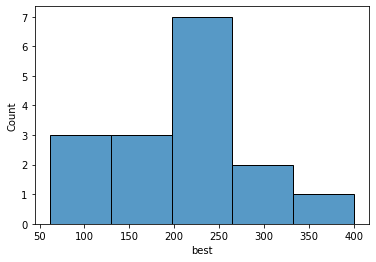

In [31]:
sns.histplot(df.best)

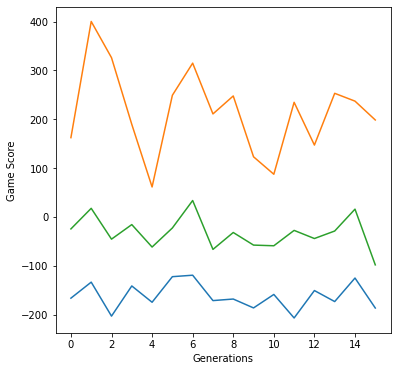

In [32]:
fig, ax = plt.subplots(figsize=(6, 6))

# add the plots for each dataframe
sns.lineplot(x='generations', y='worst', data=df)
sns.lineplot(x='generations', y='best', data=df)
sns.lineplot(x='generations', y='mean', data=df)
ax.set(ylabel='Avarage Game Score', xlabel='Generations')
plt.show()

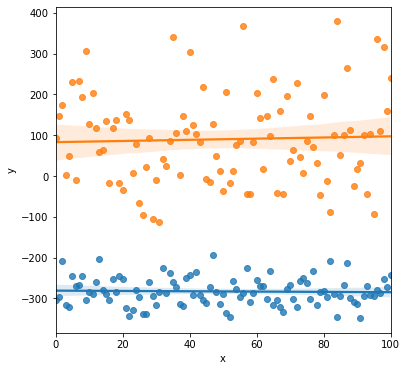

In [10]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6, 6))

# add the plots for each dataframe
sns.regplot(x='generations', y='worst', data=df, fit_reg=True)
sns.regplot(x='generations', y='best', data=df, fit_reg=True)
ax.set(ylabel='y', xlabel='x')
plt.show()

In [11]:
df.to_csv('100_geracoes_small_mutation.csv')